<a href="https://colab.research.google.com/github/veillette/jupyterNotebooks/blob/main/Advanced%20Lab/Error%20Propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Error propagation
### Function that performs error propagation for any function of multiple variables

In this general method:

- You define the error_propagation function, which takes the function to be evaluated (func), a list of variables (variables), and a list of their associated uncertainties (uncertainties).

- Inside the function, it calculates the function value (func_value) and then computes the squared partial derivatives with respect to each variable.

- The total uncertainty is calculated as the square root of the sum of the squared partial derivatives times the uncertainties.

- The function returns both the function value and the total uncertainty.

- You can use this error_propagation function with any function that takes multiple variables and their uncertainties to calculate the propagated uncertainty for the function's output.

In [34]:
import numpy as np

def error_propagation(func, variables, uncertainties):
    # Calculate the function value
    func_value = func(*variables)

    # Calculate the squared partial derivatives
    squared_partial_derivatives_times_square_uncertainties = []
    for i in range(len(variables)):
        perturbed_vars = variables.copy()
        perturbed_vars[i] += uncertainties[i]
        partial_derivative = (func(*perturbed_vars) - func_value) / uncertainties[i]
        squared_partial_derivatives_times_square_uncertainties.append(partial_derivative**2*uncertainties[i]**2)

    # Calculate the total uncertainty
    total_uncertainty = np.sqrt(sum(squared_partial_derivatives_times_square_uncertainties))

    return func_value, total_uncertainty

The code above uses a function value $$f(x_1,x_2,x_3, \cdots)$$.
For each variable, it calculates the squared partial derivative:

  -It creates a copy of the variables and perturbs one variable by its uncertainty.
  -It calculates the partial derivative using the finite difference method:
    $$ \frac{\partial f}{\partial x_i} \approx \frac{f(x_1, \ldots, x_i + \delta x_i, \ldots, x_n) - f(x_1, \ldots, x_n)}{\delta x_i} $$
  -It squares the partial derivative and stores it in a list.


 Finally, it calculates the total uncertainty using the formula:
$$ \sigma_f = \sqrt{\sum_{i=1}^n \left(\frac{\partial f}{\partial x_i}\right)^2 \sigma_{x_i}^2} $$
where $\sigma_f$ is the total uncertainty, $\frac{\partial f}{\partial x_i}$ are the partial derivatives, and $\sigma_{x_i}$ are the individual uncertainties.

The function returns both the function value and the total uncertainty.

The following plots illustrate the error propagation method for single-variable functions, which serves as the foundation for understanding how measurement uncertainties propagate through more complex multivariable calculations in experimental physics.

It shows how the local slope (derivative) at a measurement point determines the transformation of uncertainties from input to output variable.

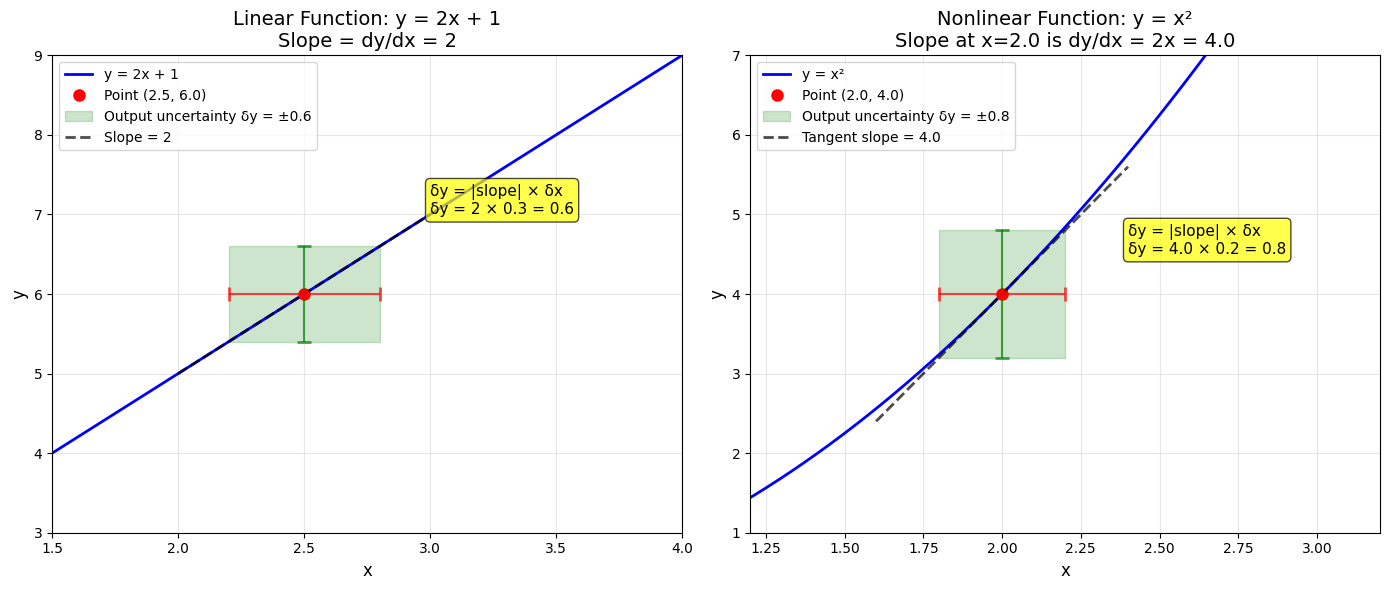

Error Propagation Summary:
For y = f(x), uncertainty propagates as: δy ≈ |f'(x)| × δx

Linear example (y = 2x + 1):
  Slope = 2 (constant)
  δx = ±0.3 → δy = 2 × 0.3 = ±0.6

Nonlinear example (y = x²):
  Slope at x = 2.0: dy/dx = 2x = 4.0
  δx = ±0.2 → δy = 4.0 × 0.2 = ±0.8


In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Example 1: Linear function y = 2x + 1
x_lin = np.linspace(0, 5, 100)
y_lin = 2 * x_lin + 1

# Point of interest and its uncertainty
x0_lin = 2.5
dx_lin = 0.3
y0_lin = 2 * x0_lin + 1
dy_lin = 2 * dx_lin  # slope = 2, so dy = slope * dx

# Plot linear function
ax1.plot(x_lin, y_lin, 'b-', linewidth=2, label='y = 2x + 1')
ax1.plot(x0_lin, y0_lin, 'ro', markersize=8, label=f'Point ({x0_lin}, {y0_lin})')

# Show input uncertainty
ax1.errorbar(x0_lin, y0_lin, xerr=dx_lin, fmt='ro', capsize=5, capthick=2,
             ecolor='red', alpha=0.7)

# Show output uncertainty
ax1.errorbar(x0_lin, y0_lin, yerr=dy_lin, fmt='ro', capsize=5, capthick=2,
             ecolor='green', alpha=0.7)
ax1.fill_between([x0_lin-dx_lin, x0_lin+dx_lin], y0_lin-dy_lin, y0_lin+dy_lin,
                 color='green', alpha=0.2, label=f'Output uncertainty δy = ±{dy_lin}')

# Show tangent line (slope)
x_tangent = np.array([x0_lin-0.5, x0_lin+0.5])
y_tangent = y0_lin + 2 * (x_tangent - x0_lin)
ax1.plot(x_tangent, y_tangent, 'k--', linewidth=2, alpha=0.7, label='Slope = 2')

ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_title('Linear Function: y = 2x + 1\nSlope = dy/dx = 2', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=10)
ax1.set_xlim(1.5, 4)
ax1.set_ylim(3, 9)

# Add annotation showing the relationship
ax1.annotate(f'δy = |slope| × δx\nδy = 2 × {dx_lin} = {dy_lin}',
             xy=(x0_lin+0.5, y0_lin+1), fontsize=11,
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

# Example 2: Nonlinear function y = x²
x_nonlin = np.linspace(0, 4, 100)
y_nonlin = x_nonlin**2

# Point of interest and its uncertainty
x0_nonlin = 2.0
dx_nonlin = 0.2
y0_nonlin = x0_nonlin**2
# For y = x², dy/dx = 2x, so dy = 2x * dx
slope_nonlin = 2 * x0_nonlin
dy_nonlin = slope_nonlin * dx_nonlin

# Plot nonlinear function
ax2.plot(x_nonlin, y_nonlin, 'b-', linewidth=2, label='y = x²')
ax2.plot(x0_nonlin, y0_nonlin, 'ro', markersize=8, label=f'Point ({x0_nonlin}, {y0_nonlin})')

# Show input uncertainty
ax2.errorbar(x0_nonlin, y0_nonlin, xerr=dx_nonlin, fmt='ro', capsize=5, capthick=2,
             ecolor='red', alpha=0.7)

# Show output uncertainty
ax2.errorbar(x0_nonlin, y0_nonlin, yerr=dy_nonlin, fmt='ro', capsize=5, capthick=2,
             ecolor='green', alpha=0.7)
ax2.fill_between([x0_nonlin-dx_nonlin, x0_nonlin+dx_nonlin], y0_nonlin-dy_nonlin, y0_nonlin+dy_nonlin,
                 color='green', alpha=0.2, label=f'Output uncertainty δy = ±{dy_nonlin:.1f}')

# Show tangent line (slope at the point)
x_tangent_nonlin = np.array([x0_nonlin-0.4, x0_nonlin+0.4])
y_tangent_nonlin = y0_nonlin + slope_nonlin * (x_tangent_nonlin - x0_nonlin)
ax2.plot(x_tangent_nonlin, y_tangent_nonlin, 'k--', linewidth=2, alpha=0.7,
         label=f'Tangent slope = {slope_nonlin}')

ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('y', fontsize=12)
ax2.set_title(f'Nonlinear Function: y = x²\nSlope at x={x0_nonlin} is dy/dx = 2x = {slope_nonlin}', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=10)
ax2.set_xlim(1.2, 3.2)
ax2.set_ylim(1, 7)

# Add annotation showing the relationship
ax2.annotate(f'δy = |slope| × δx\nδy = {slope_nonlin} × {dx_nonlin} = {dy_nonlin:.1f}',
             xy=(x0_nonlin+0.4, y0_nonlin+0.5), fontsize=11,
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.tight_layout()
plt.show()

plt.show()

print("Error Propagation Summary:")
print(f"For y = f(x), uncertainty propagates as: δy ≈ |f'(x)| × δx")
print(f"\nLinear example (y = 2x + 1):")
print(f"  Slope = 2 (constant)")
print(f"  δx = ±{dx_lin} → δy = 2 × {dx_lin} = ±{dy_lin}")
print(f"\nNonlinear example (y = x²):")
print(f"  Slope at x = {x0_nonlin}: dy/dx = 2x = {slope_nonlin}")
print(f"  δx = ±{dx_nonlin} → δy = {slope_nonlin} × {dx_nonlin} = ±{dy_nonlin:.1f}")


# Example

Let's apply the **error propagation** techniques for calculating the surface area of a cylinder when the input measurements have associated uncertainties.

We're calculating the total surface area of a cylinder (including both circular ends):

```
Surface Area = 2πr² + 2πrh
```

Where:
- `r` = radius of the cylinder
- `h` = height of the cylinder
- The first term `2πr²` represents the area of both circular ends
- The second term `2πrh` represents the curved surface area


Real experimental measurements always have uncertainties. Here:
- Radius: 3.00 ± 0.05 m
- Height: 10.0 ± 0.1 m

Results should be outputted to one decimal place, which is appropriate given the precision of the input uncertainties.


In [59]:
# Example usage:
# Define a function that calculates the surface area of a cylinder (including top and bottom)
# Surface Area = 2 * pi * r^2 + 2 * pi * r * h
def cylinder_surface_area(radius, height):
    return 2 * np.pi * radius**2 + 2 * np.pi * radius * height

# Define the measured values and their uncertainties for radius and height
radius_value = 3.0  # in meters
radius_uncertainty = 0.05 # in meters
height_value = 10.0 # in meters
height_uncertainty = 0.1 # in meters

# Combine values and uncertainties into single arrays
variables_cylinder = [radius_value, height_value]
uncertainties_cylinder = [radius_uncertainty, height_uncertainty]

# Perform error propagation
area_result, area_error = error_propagation(cylinder_surface_area, variables_cylinder, uncertainties_cylinder)

# Print the result and total uncertainty
print(f"Cylinder Surface Area = {area_result:.1f} m^2")
print(f"Cylinder Surface Area Uncertainty = {area_error:.1f} m^2")

Cylinder Surface Area = 245.0 m^2
Cylinder Surface Area Uncertainty = 5.4 m^2


In [61]:
# Example usage:
# Define a function that finds the half life, knowing the decay rate
def half_life( decayRate):
    return np.log(2)/decayRate

# Define the values and uncertainties (in absolute values) for the variables
lambda_value = [0.0045]
lambda_uncertainty = [0.00003]

# Perform error propagation
result, error = error_propagation(half_life, lambda_value, lambda_uncertainty)

# Print the result and total uncertainty
print(f"half-Life = {result:.1f} s ± {error:.1f} s")

half-Life = 154.0 s ± 1.0 s


In [62]:
# Example usage:
# Define a function that calculates the volume of a sphere
def sphere_volume(radius):
    return (4/3) * np.pi * radius**3

# Define the value and uncertainty for the radius
radius_value = [5.0]
radius_uncertainty = [0.1]

# Perform error propagation
volume_result, volume_error = error_propagation(sphere_volume, radius_value, radius_uncertainty)

# Print the result and total uncertainty
print(f"Sphere Volume = {volume_result:.1f}")
print(f"Sphere Volume Uncertainty = {volume_error:.1f}")

Sphere Volume = 523.6
Sphere Volume Uncertainty = 32.0


In [63]:
# Example usage:
# Define a function to calculate g from distance and time of fall (assuming initial velocity is 0)
# d = 0.5 * g * t^2  =>  g = 2 * d / t^2
def calculate_g(distance, time):
    return 2 * distance / (time**2)

# Define the measured values and their uncertainties for distance and time
# Saye the distance was 2.0m \pm 0.01m and the time was 0.63s \pm 0.02s
# Combine values and uncertainties into single arrays
variables_g = [2.0, 0.63]  # [distance in meters, time in seconds]
uncertainties_g = [0.01, 0.02] # [uncertainty in distance, uncertainty in time]

# Perform error propagation
g_result, g_error = error_propagation(calculate_g, variables_g, uncertainties_g)

# Print the result and total uncertainty
print(f"Value of g = {g_result:.2f} m/s^2")
print(f"Uncertainty in g = {g_error:.2f} m/s^2")

Value of g = 10.08 m/s^2
Uncertainty in g = 0.61 m/s^2
